This notebook attempts to resolve the energy of a single photoelectron for the SensL SiPM. A variety of bias volatges are applied to the laser pulser, each with dataset with a lower voltage. We find here that we can't see the quantized peaks as expected (as as we see for the broadcom case).

In the future, we could potentially increase the voltage applied to the SiPM to try and resolve the photoelectron energy.

Note that there is no external amplification on the SiPM, but we suspect there is some internal amplification.

In [1]:
import sys        
sys.path.append('/Users/lanabozanic/MATHUSLA/MATHUSLA F2022') # Change this to the dir where mathusladataprocessing.py is.     

from mathusladataprocessing import *

In [2]:
attn = Attenuation([], "sensl sipm photon counting", channels=['1'], maxx='max')

sensl sipm photon counting/photonres_sensl_-13.csv


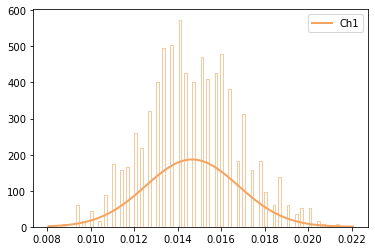

sensl sipm photon counting/photonres_sensl_-131.csv


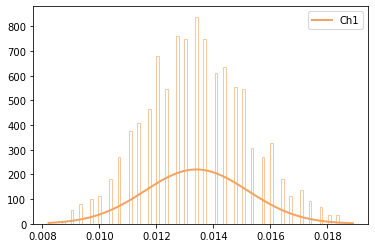

sensl sipm photon counting/photonres_sensl_-132.csv


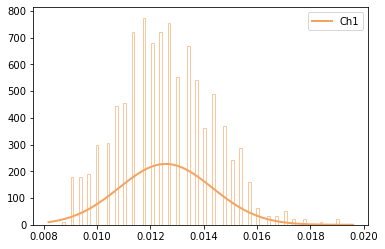

sensl sipm photon counting/photonres_sensl_-133.csv


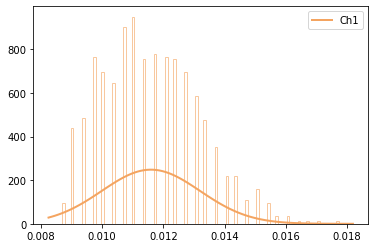

sensl sipm photon counting/photonres_sensl_-134.csv


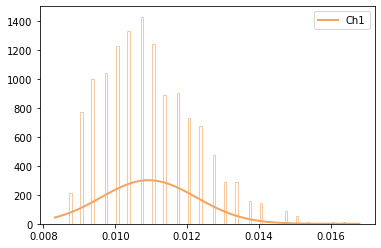

In [8]:
means, stds, amps2=attn.histogram(bins=100)

In [7]:
c[2]

[{'1': array([0.016736, 0.014728, 0.017071, 0.015063, 0.017406, 0.013054,
         0.013054, 0.018075, 0.014059, 0.017071, 0.014393, 0.015063,
         0.016067, 0.011046, 0.018745, 0.01841 , 0.013389, 0.016067,
         0.016736, 0.016067, 0.013389, 0.01205 , 0.016067, 0.016736,
         0.013054, 0.013389, 0.01841 , 0.018745, 0.014059, 0.013054,
         0.015732, 0.013724, 0.013724, 0.014728, 0.014059, 0.013724,
         0.016402, 0.013389, 0.010711, 0.014059, 0.016067, 0.013054,
         0.014728, 0.016067, 0.016402, 0.016067, 0.013389, 0.018745,
         0.01272 , 0.017071, 0.011381, 0.01205 , 0.015063, 0.01272 ,
         0.015732, 0.011046, 0.016402, 0.009372, 0.014393, 0.015397,
         0.014059, 0.019749, 0.015732, 0.010042, 0.016736, 0.015397,
         0.017741, 0.012385, 0.013724, 0.01272 , 0.011046, 0.016402,
         0.015063, 0.014059, 0.021423, 0.014059, 0.016067, 0.013389,
         0.020418, 0.013054, 0.012385, 0.014059, 0.015732, 0.016067,
         0.013724, 0.014059, 

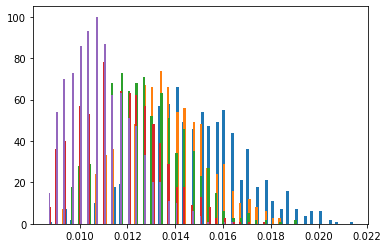

In [9]:
bins = []
for amp in amps2:
    bins.append(plt.hist(amp['1'], bins=100))
    

In [10]:
bins[0]

(array([ 1.,  0.,  0.,  0.,  0.,  7.,  0.,  2.,  0.,  0.,  5.,  0.,  0.,
         2.,  0., 10.,  0.,  0., 20.,  0.,  0., 18.,  0., 19.,  0.,  0.,
        30.,  0., 25.,  0.,  0., 37.,  0.,  0., 46.,  0., 57.,  0.,  0.,
        58.,  0.,  0., 66.,  0., 49.,  0.,  0., 46.,  0.,  0., 54.,  0.,
        47.,  0.,  0., 49.,  0., 55.,  0.,  0., 44.,  0.,  0., 21.,  0.,
        36.,  0.,  0., 18.,  0.,  0., 21.,  0., 11.,  0.,  0.,  7.,  0.,
        16.,  0.,  0.,  7.,  0.,  0.,  4.,  0.,  6.,  0.,  0.,  6.,  0.,
         0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.008703 , 0.0088302, 0.0089574, 0.0090846, 0.0092118, 0.009339 ,
        0.0094662, 0.0095934, 0.0097206, 0.0098478, 0.009975 , 0.0101022,
        0.0102294, 0.0103566, 0.0104838, 0.010611 , 0.0107382, 0.0108654,
        0.0109926, 0.0111198, 0.011247 , 0.0113742, 0.0115014, 0.0116286,
        0.0117558, 0.011883 , 0.0120102, 0.0121374, 0.0122646, 0.0123918,
        0.012519 , 0.0126462, 0.0127734, 0.0129006, 0.0130278, 0

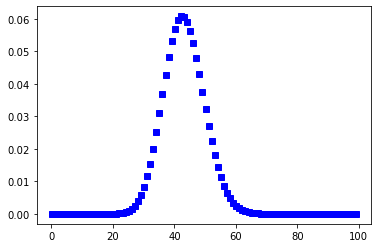

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

t = np.arange(0.1, 100, 1)
lambd=43
d = np.exp(-lambd) * (lambd ** t) / factorial(t)

plt.plot(t, d, 'bs')
plt.show()

## Test 2 -- Resolving photon energy through darkcounts
- Set operating voltage at 30 V
- Take Max data at different trigger thresholds

In [4]:
attn2 = Attenuation([], "darkcounts", channels=['1'], maxx='max')

darkcounts/sensl darkcounts 30 V 0 (3mv trigger).csv


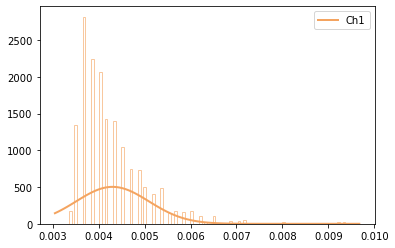

darkcounts/sensl darkcounts 30 V 1m (5mV trigger).csv


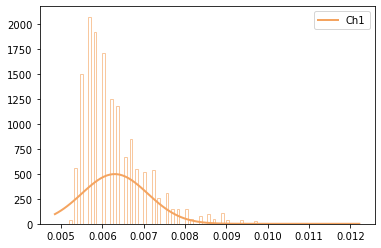

darkcounts/sensl darkcounts 30 V 2 (7mV trigger) 0.csv


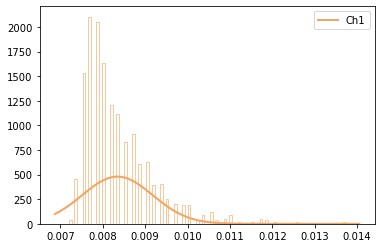

darkcounts/sensl darkcounts 30 min 3.csv


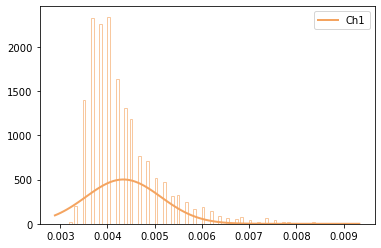

In [72]:
means, stds, amps=attn2.histogram(bins=100, single_fit=True)

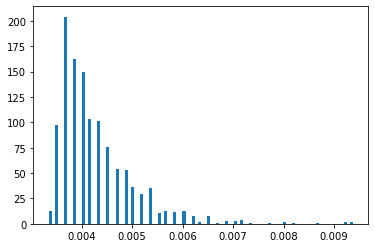

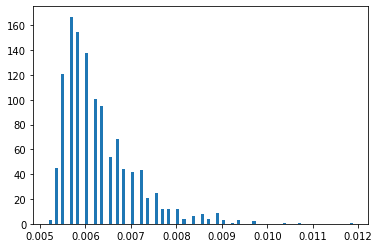

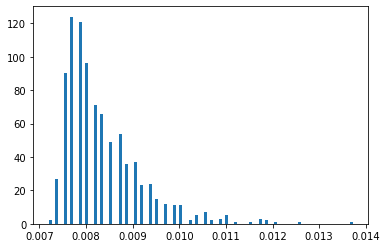

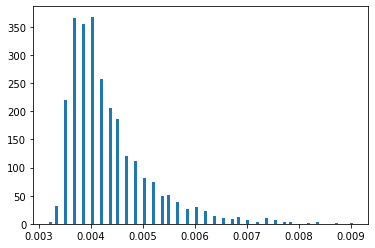

In [6]:
bins = []
for amp in amps:
    bins.append(plt.hist(amp['1'], bins=100))
    plt.show()

In [83]:
test_amps = amps[0]['1'] * 10000

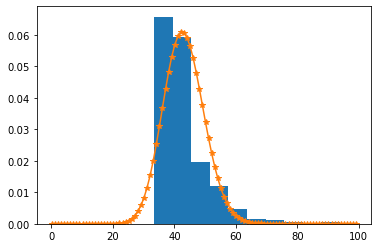

In [95]:
c=plt.hist(test_amps, density=True)
plt.plot(t, d, marker='*')
plt.show()

In [26]:
means

{'1': [0.004300317651956703, 0.006300884013322232, 0.008345398560354373]}

In [27]:
means['1']

[0.004300317651956703, 0.006300884013322232, 0.008345398560354373]

In [28]:
means['1'][0] - means['1'][1]

-0.002000566361365529

In [29]:
means['1'][1] - means['1'][2]

-0.002044514547032141

In [30]:
max(amps[0]['1'])

0.0093724

In [31]:
max(amps[1]['1'])

0.0118828

In [32]:
max(amps[2]['1'])

0.0137238

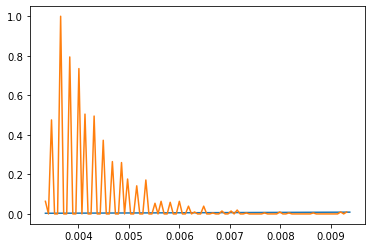

In [126]:
x = bins[0][1]
mu = np.mean(x)
y = []
for item in np.linspace(min(bins[0][1]), max(bins[0][1]), 1000):
    y.append((mu**item)*np.exp(-mu)/math.gamma(item)) 

plt.plot(np.linspace(min(bins[0][1]), max(bins[0][1]), 1000),y)
plt.plot(bins[0][1][:-1], (bins[0][0]- min(bins[0][0]))/(max(bins[0][0]) - min(bins[0][0])))

(0, 0.001)

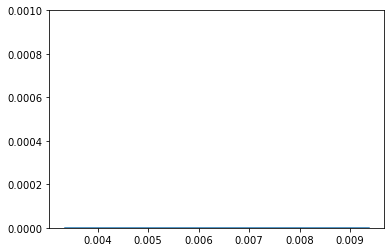

In [67]:
plt.plot(x, scipy.stats.poisson.pmf(x, mu))
plt.ylim(0,0.001)

In [68]:
max(scipy.stats.poisson.pmf(x, mu))

0.0

In [75]:
np.mean(x)

0.009900990099009901

In [71]:
x

array([0.0033473 , 0.00340755, 0.0034678 , 0.00352805, 0.0035883 ,
       0.00364855, 0.00370881, 0.00376906, 0.00382931, 0.00388956,
       0.00394981, 0.00401006, 0.00407031, 0.00413056, 0.00419081,
       0.00425107, 0.00431132, 0.00437157, 0.00443182, 0.00449207,
       0.00455232, 0.00461257, 0.00467282, 0.00473307, 0.00479332,
       0.00485357, 0.00491383, 0.00497408, 0.00503433, 0.00509458,
       0.00515483, 0.00521508, 0.00527533, 0.00533558, 0.00539583,
       0.00545608, 0.00551634, 0.00557659, 0.00563684, 0.00569709,
       0.00575734, 0.00581759, 0.00587784, 0.00593809, 0.00599834,
       0.00605859, 0.00611885, 0.0061791 , 0.00623935, 0.0062996 ,
       0.00635985, 0.0064201 , 0.00648035, 0.0065406 , 0.00660085,
       0.00666111, 0.00672136, 0.00678161, 0.00684186, 0.00690211,
       0.00696236, 0.00702261, 0.00708286, 0.00714311, 0.00720336,
       0.00726362, 0.00732387, 0.00738412, 0.00744437, 0.00750462,
       0.00756487, 0.00762512, 0.00768537, 0.00774562, 0.00780

In [132]:
np.mean(amps[1]['1'])

0.006300884013322232

In [131]:
np.std(amps[1]['1'])

0.0007998765566360848

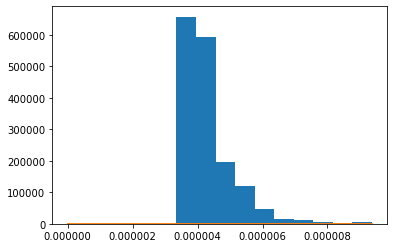

In [228]:
from scipy.stats import poisson
import numpy as np
from matplotlib import pyplot as plt

x= amps[0]['1'] /1000
bins = np.histogram_bin_edges(x, 100)

plt.hist(x,  density=True)
lamd = np.mean(x)
x_plot = np.linspace(0, max(x))
plt.plot(x_plot, poisson.pmf(x_plot, lamd), label='Poisson')

#plt.ylim(0,5)
plt.show()

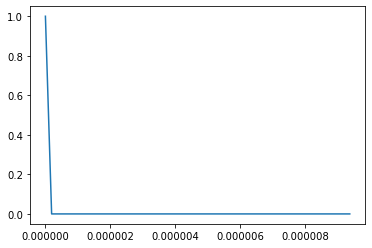

In [229]:
plt.plot(x_plot, poisson.pmf(x_plot, lamd), label='Poisson')


In [226]:
np.histogram_bin_edges(x) / 100

array([0.00033473, 0.00039498, 0.00045523, 0.00051548, 0.00057573,
       0.00063599, 0.00069624, 0.00075649, 0.00081674, 0.00087699,
       0.00093724])

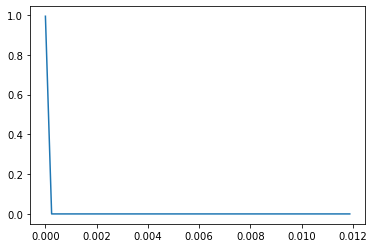

In [146]:
plt.plot(x_plot, poisson.pmf(x_plot, lamd), label='Poisson')


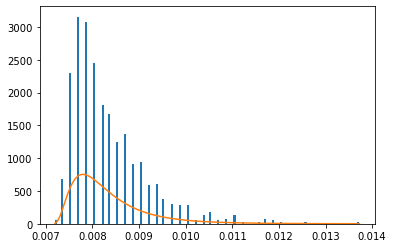

In [27]:

data= amps[2]['1']
plt.hist(data, bins=150,density=True)
lnspc = np.linspace(min(data), max(data), len(data) )
x, y,z = scipy.stats.lognorm.fit(data)
pdf_chi = scipy.stats.lognorm.pdf(lnspc, x,y,z)
plt.plot(lnspc, pdf_chi)
plt.show()

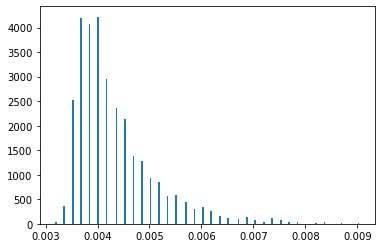

In [14]:
l=plt.hist(amps[3]['1'], bins=180,density=True)

In [32]:

for a in amps[0]['1']:
    print(a,',')

0.0038494 ,
0.0038494 ,
0.003682 ,
0.0041841 ,
0.0046862 ,
0.003682 ,
0.0038494 ,
0.0040167 ,
0.003682 ,
0.0060251 ,
0.0043515 ,
0.0053556 ,
0.0053556 ,
0.0061925 ,
0.0051883 ,
0.0046862 ,
0.0038494 ,
0.003682 ,
0.0035146 ,
0.0035146 ,
0.0046862 ,
0.003682 ,
0.003682 ,
0.0038494 ,
0.0045188 ,
0.0041841 ,
0.0051883 ,
0.003682 ,
0.003682 ,
0.0035146 ,
0.0041841 ,
0.0041841 ,
0.0045188 ,
0.0041841 ,
0.0043515 ,
0.0038494 ,
0.003682 ,
0.0035146 ,
0.0035146 ,
0.0040167 ,
0.003682 ,
0.003682 ,
0.003682 ,
0.0041841 ,
0.0048536 ,
0.0045188 ,
0.0038494 ,
0.003682 ,
0.0043515 ,
0.0043515 ,
0.0038494 ,
0.0038494 ,
0.003682 ,
0.0038494 ,
0.003682 ,
0.0035146 ,
0.003682 ,
0.0043515 ,
0.0038494 ,
0.0040167 ,
0.0040167 ,
0.0040167 ,
0.0043515 ,
0.0040167 ,
0.009205 ,
0.0060251 ,
0.0045188 ,
0.003682 ,
0.0046862 ,
0.0041841 ,
0.0041841 ,
0.0038494 ,
0.0048536 ,
0.0045188 ,
0.0038494 ,
0.0040167 ,
0.0035146 ,
0.0041841 ,
0.0043515 ,
0.0033473 ,
0.0040167 ,
0.003682 ,
0.0038494 ,
0.0041841 ,
0.0033473 ,

0.0040167 ,
0.0050209 ,
0.003682 ,
0.003682 ,
0.0043515 ,
0.0048536 ,
0.0068619 ,
0.0053556 ,
0.0048536 ,
0.0040167 ,
0.0060251 ,
0.0051883 ,
0.003682 ,
0.0050209 ,
0.0040167 ,
0.0065272 ,
0.0056904 ,
0.003682 ,
0.0038494 ,
0.0040167 ,
0.0035146 ,
0.0040167 ,
0.0048536 ,
0.0043515 ,
0.005523 ,
0.0038494 ,
0.0043515 ,
0.0038494 ,
0.0035146 ,
0.0040167 ,
0.0056904 ,
0.003682 ,
0.003682 ,
0.0040167 ,
0.0045188 ,
0.0038494 ,
0.0048536 ,
0.0046862 ,
0.0043515 ,
0.003682 ,
0.003682 ,
0.0040167 ,
0.0050209 ,
0.0045188 ,
0.0038494 ,
0.0040167 ,
0.0045188 ,
0.0060251 ,
0.0038494 ,
0.0051883 ,
0.003682 ,
0.0051883 ,
0.0046862 ,
0.0041841 ,
0.0035146 ,
0.0051883 ,
0.0043515 ,
0.0043515 ,
0.0051883 ,
0.005523 ,
0.003682 ,
0.0045188 ,
0.0038494 ,
0.0041841 ,
0.0048536 ,
0.003682 ,
0.0035146 ,
0.003682 ,
0.0045188 ,
0.0053556 ,
0.003682 ,
0.0040167 ,
0.0038494 ,
0.0038494 ,
0.0048536 ,
0.0033473 ,
0.0046862 ,
0.0043515 ,
0.003682 ,
0.0040167 ,
0.0035146 ,
0.0048536 ,
0.0038494 ,
0.0035146 ,
0.003849